In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import pandas as pd
import seaborn as sns

import sys
sys.path.append( '../src/' )

from datetime import timedelta
from mpl_toolkits.mplot3d import Axes3D
from ml.visualization import *

# Data Preparation

In [2]:
path = [ '../', 'datasets' ]
home_file = 'ds-home-1sec.csv'

df = pd.read_csv( os.path.join( *path, home_file ), index_col = 'date', parse_dates = [ 'date' ] ).drop( 'ven', axis = 1 )
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 295823 entries, 2020-05-14 21:08:39 to 2020-06-04 23:08:59
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pre     295823 non-null  float64
 1   hum     295823 non-null  float64
 2   tem     295823 non-null  float64
 3   occ     295823 non-null  object 
dtypes: float64(3), object(1)
memory usage: 11.3+ MB


## - Checking missing values

In [3]:
np.sum( df.isnull() )

pre    0
hum    0
tem    0
occ    0
dtype: int64

In [4]:
df[ 'hum' ].fillna( method ='ffill', inplace = True )
np.sum( df.isnull() )

pre    0
hum    0
tem    0
occ    0
dtype: int64

## - Checking for errors in dates

In [5]:
df.resample( 'D' ).first().dropna()

,pre,hum,tem,occ
date,,,,
2020-05-14,94270.77,54.49,30.99,L
2020-05-15,94370.42,58.81,30.98,H
2020-05-24,94262.10,53.70,31.57,H
2020-05-25,93951.84,53.34,32.03,M
2020-05-26,94309.47,51.66,31.58,M
2020-05-27,94857.58,59.15,28.62,E
2020-05-28,94456.61,58.74,30.09,L
2020-05-29,95053.27,43.50,32.06,L
2020-05-31,94825.61,47.85,30.69,H


There was not error in dates. All the collection dates are correct.

# Visualizations

In [6]:
sns.set_theme( style = "whitegrid" )

colors = {
    'E': 'blue',
    'L': 'gold',
    'M': 'darkorange',
    'H': 'red' 
}

out_path = [ '..', 'assets' ]

## - Data by day and occupancy level

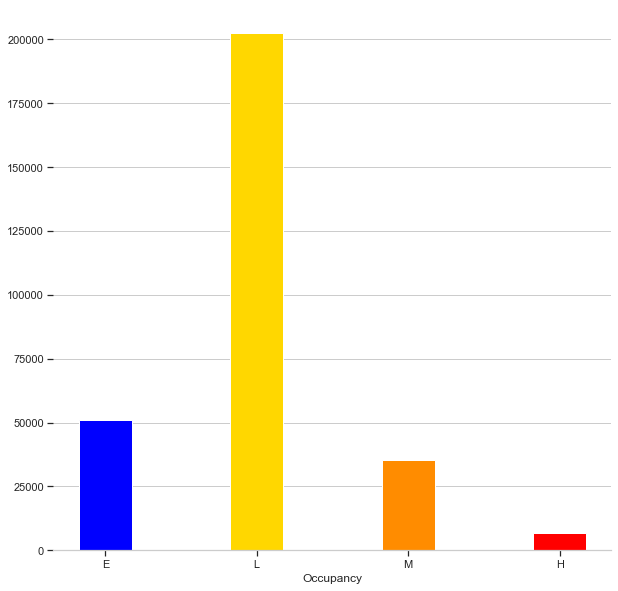

<ipython-input-7-dc6e86be010b>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig( os.path.join( *out_path, 'livingroom-counting.png' ), figsize = ( 20, 8 ) )


,pre,hum,tem
occ,,,
E,50978,50978,50978
L,202613,202613,202613
M,35410,35410,35410
H,6822,6822,6822


In [7]:
fig = plot_objects( df, colors, [ 'E', 'L', 'M', 'H' ] )
fig.savefig( os.path.join( *out_path, 'livingroom-counting.png' ), figsize = ( 20, 8 ) )
df.groupby( 'occ' ).count().loc[ [ 'E', 'L', 'M', 'H' ] ]

## - Data over time

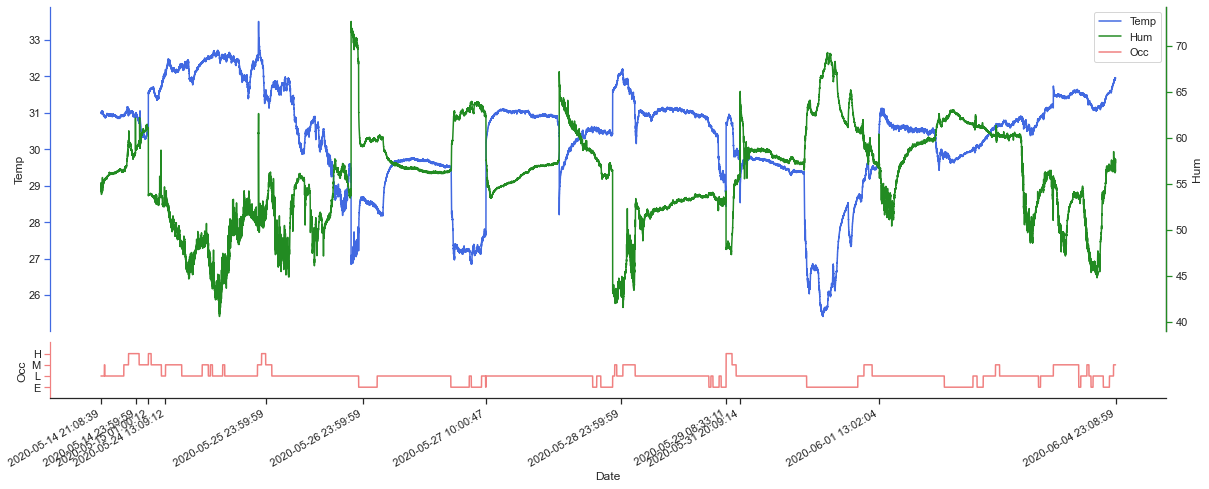

,pre,hum,tem,occ
date,,,,
2020-05-14,10214,10214,10214,10214
2020-05-15,3595,3595,3595,3595
2020-05-16,0,0,0,0
2020-05-17,0,0,0,0
2020-05-18,0,0,0,0
2020-05-19,0,0,0,0
2020-05-20,0,0,0,0
2020-05-21,0,0,0,0
2020-05-22,0,0,0,0


In [19]:
fig = plot_env_vars2( df.index, df[ 'tem' ], df[ 'hum' ], df[ 'occ' ], figsize = ( 20, 8 ), df = df )
fig.savefig( os.path.join( *out_path, 'livingroom-timeline.png' ) )
df.groupby( pd.Grouper( level = 'date', freq = 'D' ) ).count()

day: 2020-05-14 00:00:00
Counter({'L': 6528, 'H': 2194, 'M': 1492})


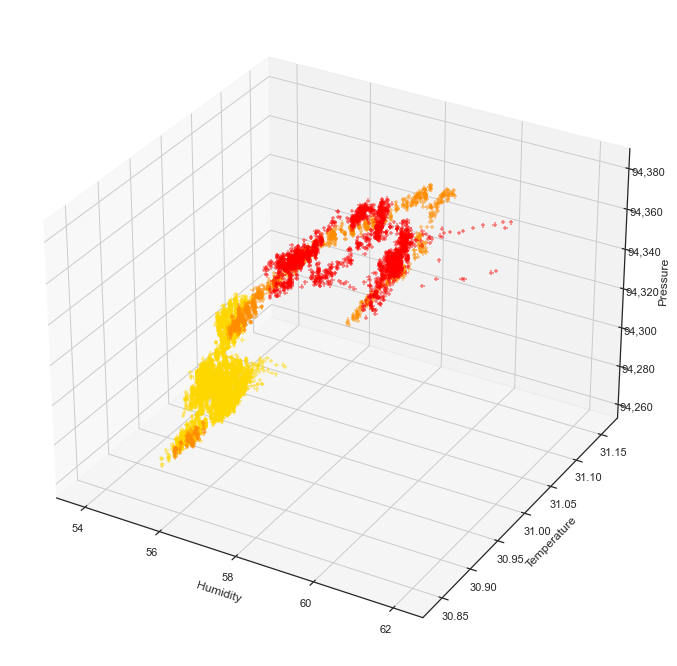

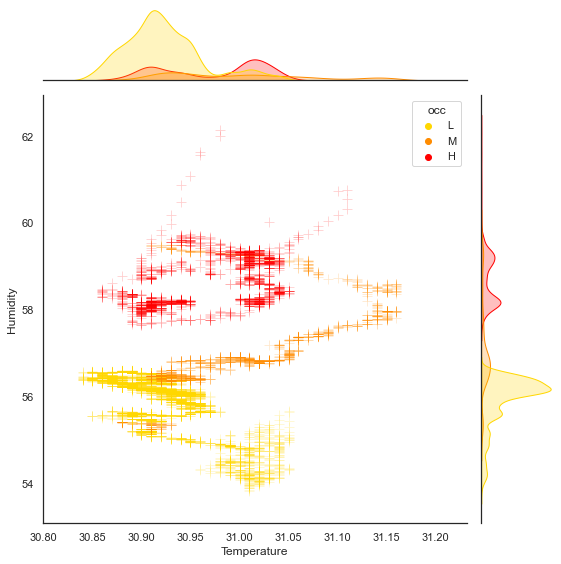

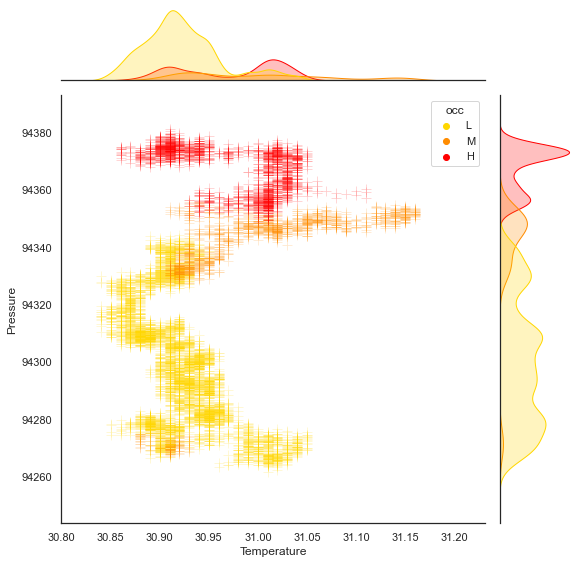

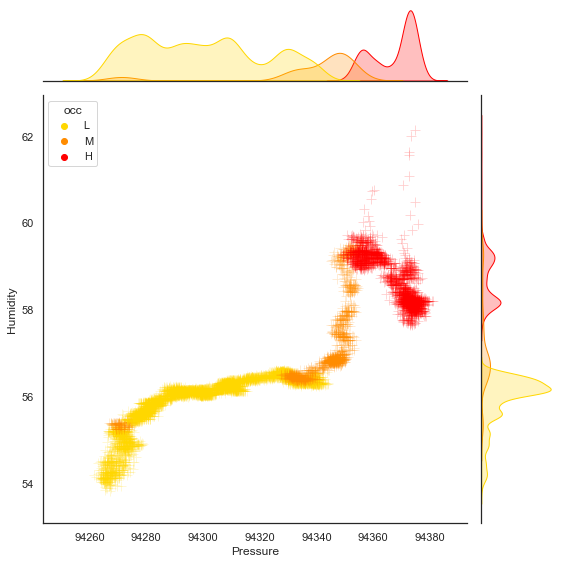

In [20]:
# %matplotlib widget
from collections import Counter

count = 0
for name, group in df.groupby( pd.Grouper( level = 'date', freq = 'D' ) ):
    if( count == 0 ):
        print( 'day:', name )
        print( Counter( group.occ ) )
        
        fig = plt.figure( figsize = ( 12, 12 ) )
        ax = fig.add_subplot( 111, projection = '3d' )
        conf = {
            'E': { 'c': 'blue', 'm': '+' },
            'L': { 'c': 'gold', 'm': '+' },
            'M': { 'c': 'darkorange', 'm': '+' },
            'H': { 'c': 'red', 'm': '+' }
        }
        
        for name2, group2 in group.groupby( 'occ' ):
            ax.scatter( group2.hum, group2.tem, group2.pre, 
                       c = conf[ name2 ][ 'c' ], 
                       marker = conf[ name2 ][ 'm' ], alpha = 0.5 )

        fmt = '{x:,.0f}'
        tick = mtick.StrMethodFormatter( fmt )
        ax.zaxis.set_major_formatter( tick )
            
        ax.set_xlabel( 'Humidity' )
        ax.set_ylabel( 'Temperature' )
        ax.set_zlabel( 'Pressure' )
        
        plt.show()
        fig.savefig( os.path.join( *out_path, 'livingroom-env.png' ) )
        
        
#         fig.suptitle( 'Living Room Temperature, Humidity, and Pressure' )

        # Sectional views
        
        g = sns.JointGrid( data = group, x = 'tem', y = "hum", hue = 'occ', palette = colors, height = 8 )
        g.plot_joint( sns.scatterplot, s = 100, alpha = .2, marker = '+',  )
        g.plot_marginals( sns.kdeplot, fill = True )
        g.set_axis_labels( 'Temperature', 'Humidity' )
        g.savefig( os.path.join( *out_path, 'livingroom_tem_hum.png' ) )

        g = sns.JointGrid( data = group, x = 'tem', y = "pre", hue = 'occ', palette = colors, height = 8 )
        g.plot_joint( sns.scatterplot, s = 100, alpha = .2, marker = '+',  )
        g.plot_marginals( sns.kdeplot, fill = True )
        g.set_axis_labels( 'Temperature', 'Pressure' )
        g.savefig( os.path.join( *out_path, 'livingroom_tem_pre.png' ) )

        g = sns.JointGrid( data = group, x = 'pre', y = "hum", hue = 'occ', palette = colors, height = 8 )
        g.plot_joint( sns.scatterplot, s = 100, alpha = .2, marker = '+',  )
        g.plot_marginals( sns.kdeplot, fill = True )
        g.set_axis_labels( 'Pressure', 'Humidity' )
        g.savefig( os.path.join( *out_path, 'livingroom_pre_hum.png' ) )
    
    count += 1

## - Data Dispersion and Distribution

Text(0.5, 0, 'Pressure')

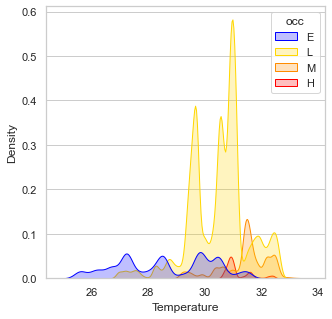

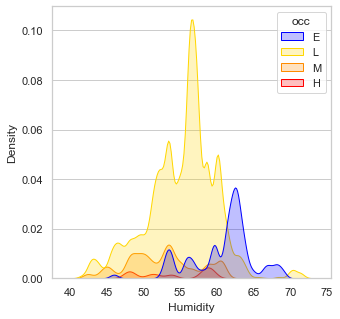

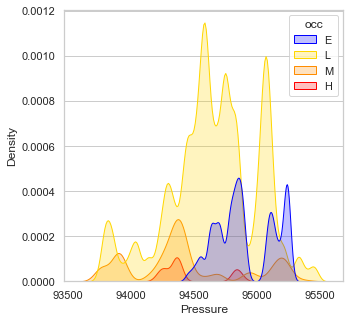

In [21]:
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter( fmt )
order = [ 'E', 'L', 'M', 'H' ]

sns.set( style = 'whitegrid' )
fig, ax = plt.subplots( figsize = ( 5, 5 ) )
g = sns.kdeplot( data = df, x = 'tem', hue = 'occ', 
    fill = True, palette = colors, hue_order = order, ax = ax )
ax.set_xlabel( 'Temperature' )

fig, ax = plt.subplots( figsize = ( 5, 5 ) )
g = sns.kdeplot( data = df, x = 'hum', hue = 'occ', 
    fill = True, palette = colors, hue_order = order, ax = ax )
ax.set_xlabel( 'Humidity' )

fig, ax = plt.subplots( figsize = ( 5, 5 ) )
g = sns.kdeplot( data = df, x = 'pre', hue = 'occ', 
    fill = True, palette = colors, hue_order = order, ax = ax )
ax.set_xlabel( 'Pressure' )

In [12]:
# setting up

sns.set_theme( style = "whitegrid" )

gini_path = 'livingroom-gini'
env_vars = [ 'pre', 'hum', 'tem' ]
levels = [ 'E', 'L', 'M', 'H' ]

scaled_df = df.copy()
scaled_df.loc[ :, env_vars ] = MinMaxScaler().fit_transform( scaled_df[ env_vars ] )
scaled_df.loc[ :, env_vars ] = pd.DataFrame( data = scaled_df, columns = env_vars + [ 'occ' ] )

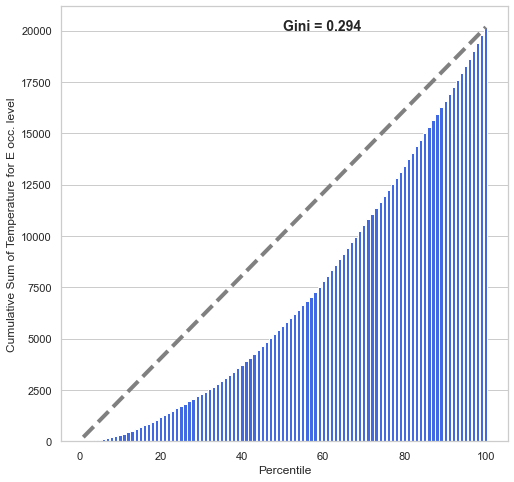

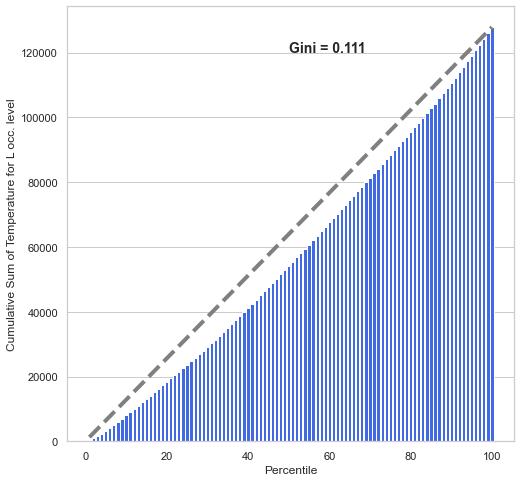

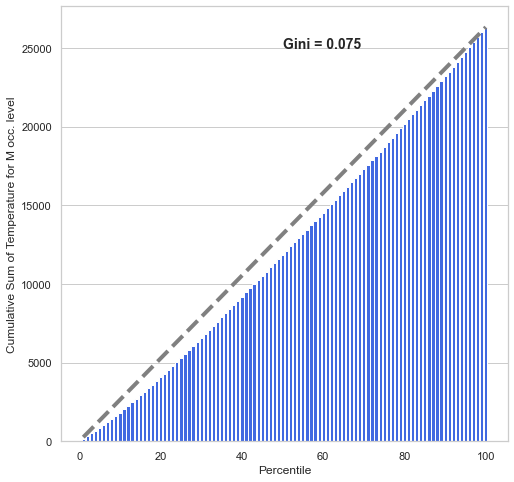

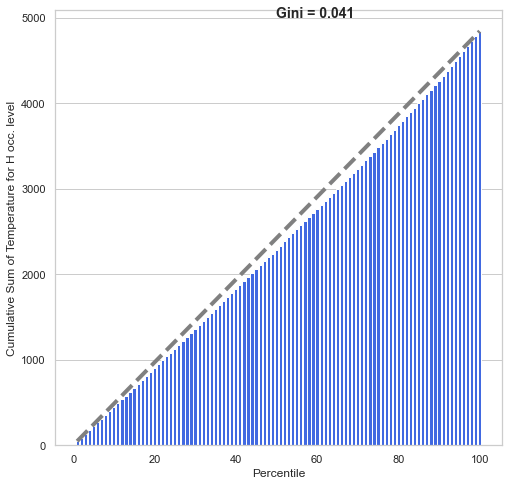

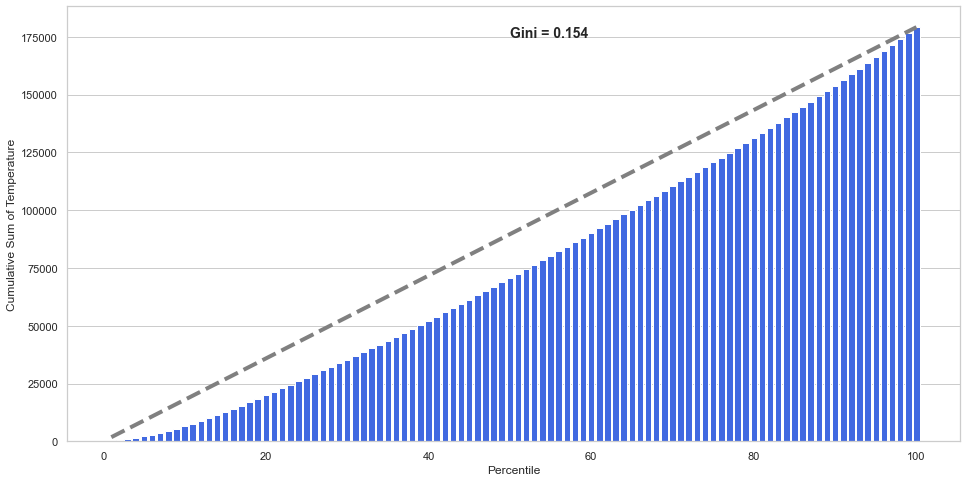

In [25]:
figs = env_var_lorenz_plots( scaled_df, 'royalblue', levels, 'tem', 'Temperature' )

for  l, f in zip( levels + [ 'total' ], figs ): 
    f.savefig( os.path.join( *out_path, gini_path, 'livingroom-tem-%s.png' % l ) )

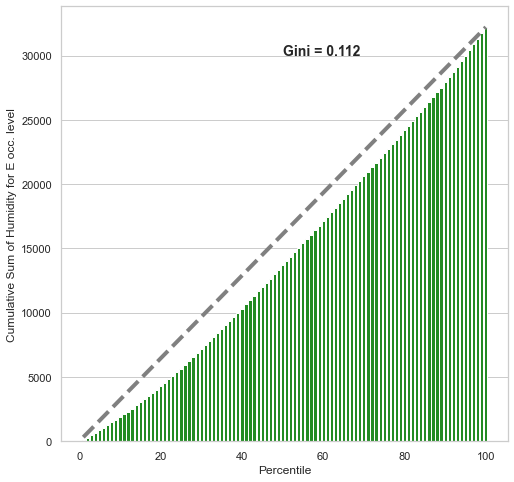

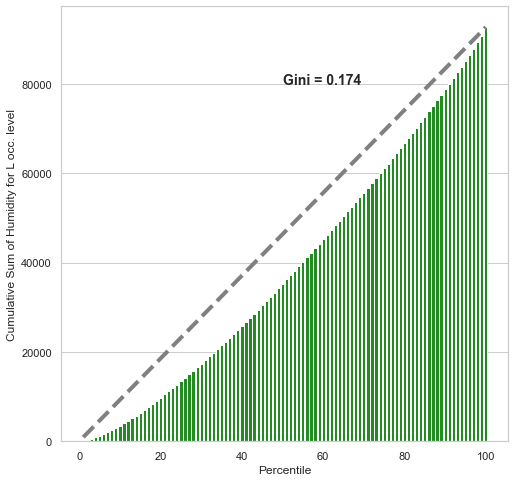

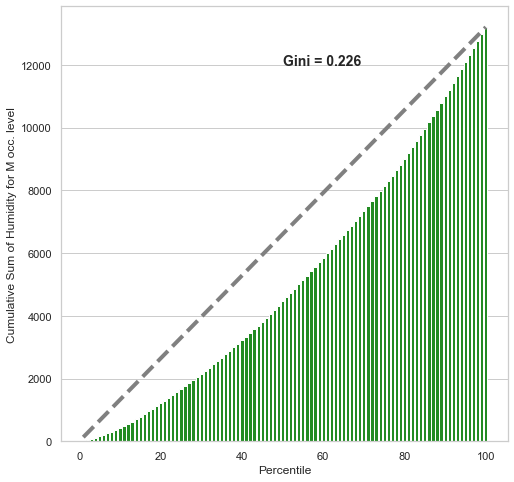

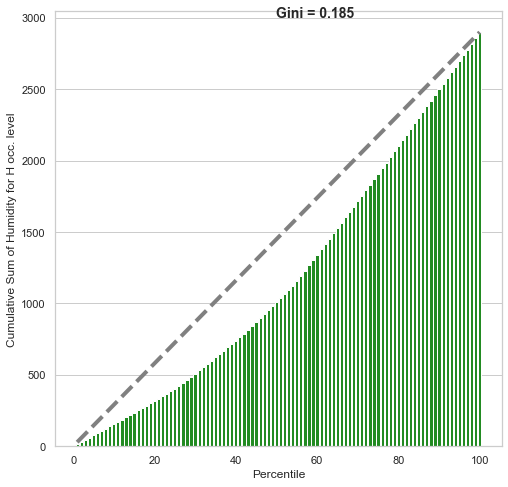

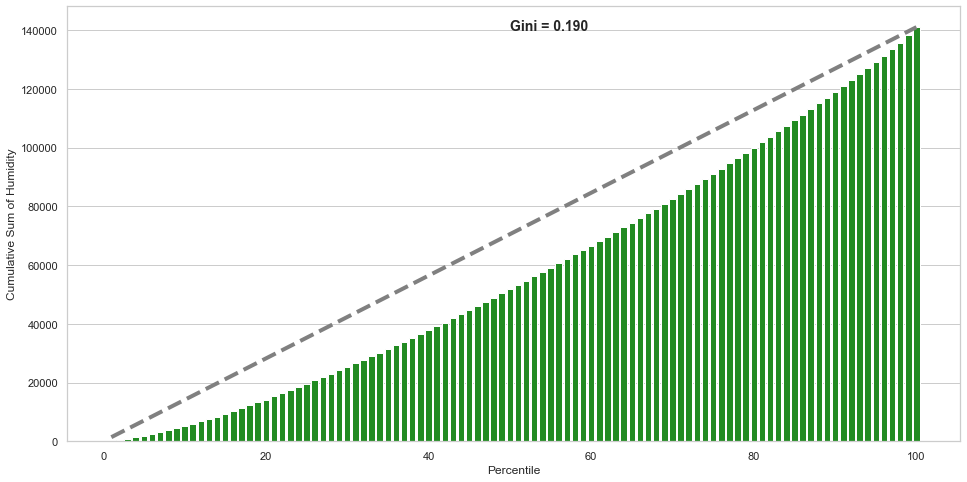

In [26]:
figs = env_var_lorenz_plots( scaled_df, 'forestgreen', levels, 'hum', 'Humidity' )

for  l, f in zip( levels + [ 'total' ], figs ): 
    f.savefig( os.path.join( *out_path, gini_path, 'livingroom-hum-%s.png' % l ) )

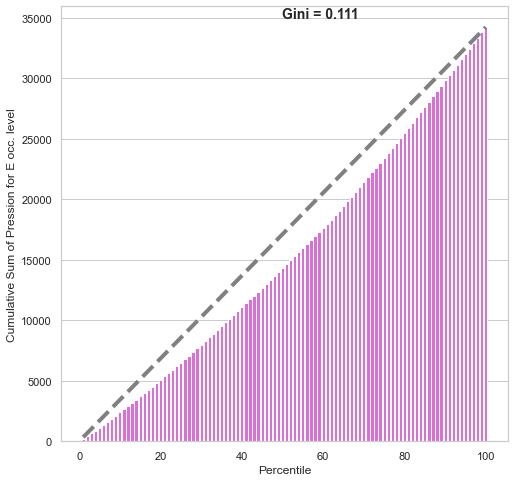

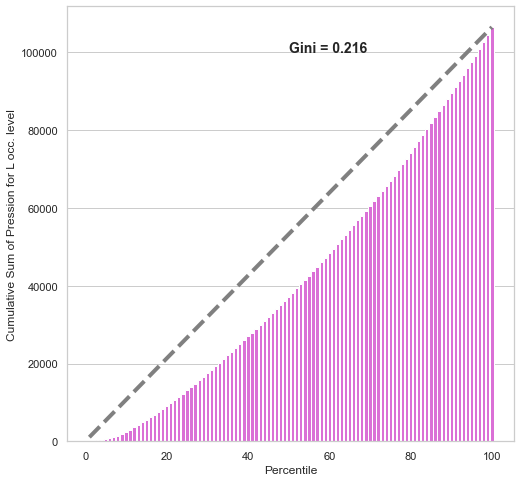

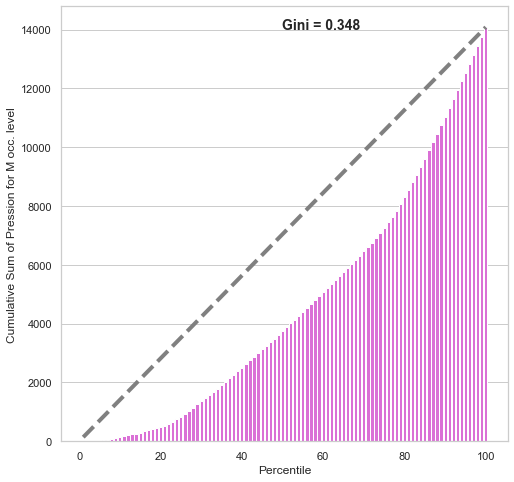

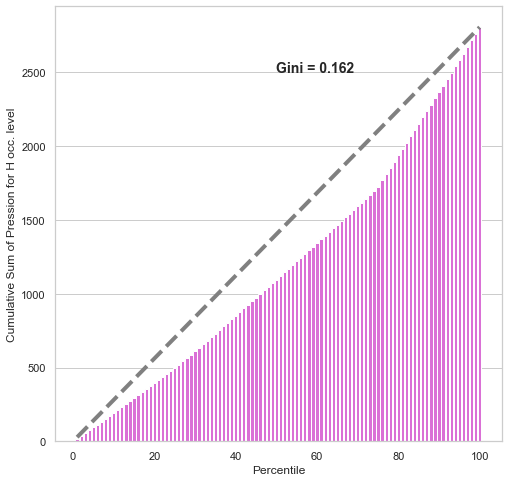

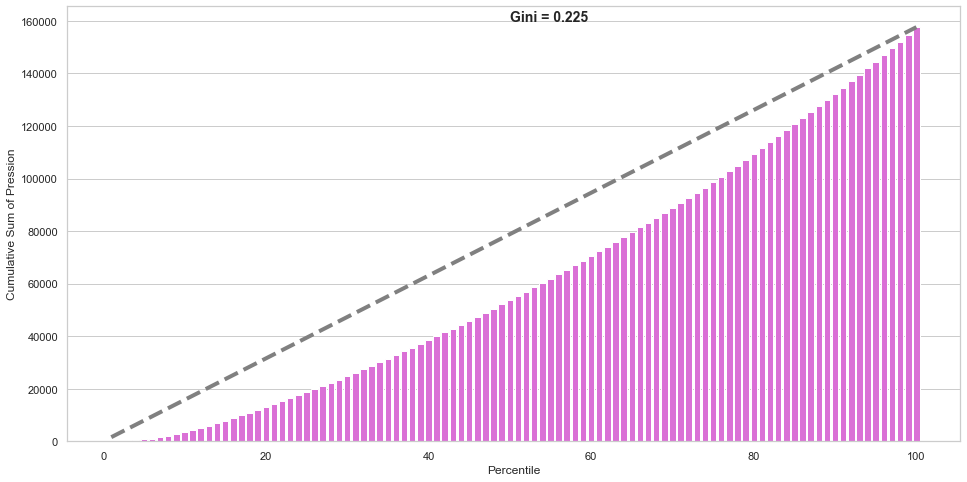

In [27]:
figs = env_var_lorenz_plots( scaled_df, 'orchid', levels, 'pre', 'Pression' )

for  l, f in zip( levels + [ 'total' ], figs ): 
    f.savefig( os.path.join( *out_path, gini_path, 'livingroom-pre-%s.png' % l ) )

## - Ranges of day Gini coeficients for occupancy levels

In [8]:
def occ_gini( occ_df ): 
    return occ_df[ env_vars ].apply( lambda col: gini( np.array( col ) ) )


def day_gini( day_df ):
    return day_df.groupby( 'occ' ).apply( occ_gini )


env_vars = [ 'pre', 'hum', 'tem' ]
levels = [ 'E', 'L', 'M', 'H' ]
gini_path = 'livingroom-gini'

temp = df.resample( '5min' ).apply( day_gini )

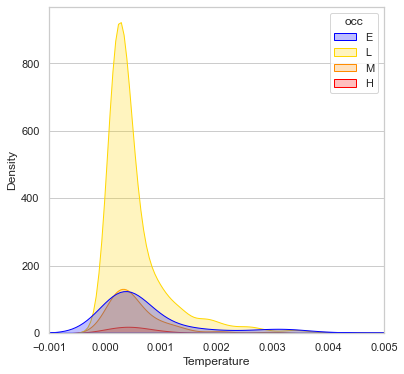

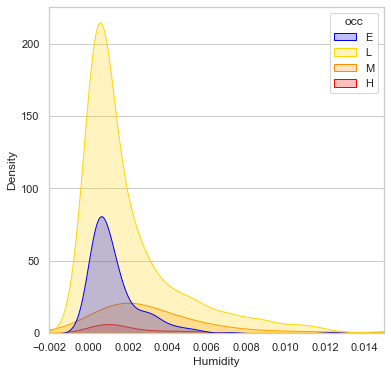

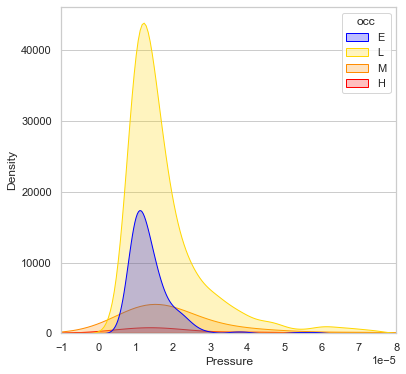

In [9]:
fig = plot_gini_by_day( temp, 'tem', 'Temperature', levels, colors, ( 6, 6 ), ( -0.001, .005 ) )
fig.savefig( os.path.join( *out_path, gini_path, 'livingroom-tem.png' ) )

fig = plot_gini_by_day( temp, 'hum', 'Humidity', levels, colors, ( 6, 6 ), ( -0.002, .015 ) )
fig.savefig( os.path.join( *out_path, gini_path, 'livingroom-hum.png' ) )

fig = plot_gini_by_day( temp, 'pre', 'Pressure', levels, colors, ( 6, 6 ), ( -0.00001, 0.00008 ) )
fig.savefig( os.path.join( *out_path, gini_path, 'livingroom-pre.png' ) )